<p style="color:white;font-size:90px;padding:50px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> Garbage Classification

<img src="https://img2.chinadaily.com.cn/images/201906/06/5cf8521ba3101765669db8f4.jpeg" width="100%" alt="Sample Image">

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> 1- Introduction

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 1.1 Problem Statement

<p style="color:#000C3C;font-size:20px;padding:15px;border-radius:15px;text-align:left"> Garbage recycling is a crucial aspect of environmental preservation. Efficient recycling relies on accurate sorting of household garbage into distinct classes. Traditional datasets often categorize garbage into a limited number of classes, but this dataset aims to improve recycling by offering a more detailed classification with 12 classes.

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 1.2 Dataset Overview

<p style="color:#000C3C;font-size:20px;padding:15px;border-radius:15px;text-align:left"> This dataset comprises 15,150 images categorized into 12 classes of household garbage, including paper, cardboard, biological, metal, plastic, green-glass, brown-glass, white-glass, clothes, shoes, batteries, and trash. The images were collected through a combination of web scraping and leveraging existing datasets on Kaggle.

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 1.3 Motivation

<p style="color:#000C3C;font-size:20px;padding:15px;border-radius:15px;text-align:left"> The motivation behind this project is to advance the recycling process by enhancing the accuracy of garbage sorting. The availability of a diverse dataset with more classes can potentially lead to a significant improvement in the percentage of recycled garbage.

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> 2- Dataset Exploration

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder">2.1 Dataset Source

<p style="color:#000C3C;font-size:20px;padding:15px;border-radius:15px;text-align:left"> 1- Clothing dataset: https://www.kaggle.com/agrigorev/clothing-dataset-full <br>
2- Garbage Classification dataset: https://www.kaggle.com/asdasdasasdas/garbage-classification

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder">2.2 Data Collection Method

<p style="color:#000C3C;font-size:20px;padding:15px;border-radius:15px;text-align:left"> Most images were collected through web scraping, aiming to capture real garbage scenarios. Challenges were encountered in obtaining images for certain classes, such as clothes or shoes, leading to the inclusion of normal clothes images in these categories.

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> 3- Data Loading and Exploration

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 3.1 Import used libraries

In [1]:
import warnings
# To suppress all warnings
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Image Processing
from PIL import Image
import cv2  # OpenCV


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
import os
import random
import gc

# encoding 
from sklearn.preprocessing import LabelEncoder

# Deep Learning Framework
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Image Augmentation (for Data Augmentation)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model Architecture Visualization
from tensorflow.keras.utils import plot_model

# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 3.2 Read the Dataset

In [2]:
# Define the path to your dataset
dataset_path = '/kaggle/input/garbage-classification/garbage_classification'

# List the contents of the dataset folder
classes = (os.listdir(dataset_path))
classes.remove("clothes")
classes.remove("shoes")
print("Classes:", classes)

Classes: ['metal', 'white-glass', 'biological', 'paper', 'brown-glass', 'battery', 'trash', 'cardboard', 'plastic', 'green-glass']


In [3]:
# Initialize empty lists for images and labels
images = []
labels = []

In [4]:
# Loop through each class folder
for class_folder in classes:
    print(class_folder)
    class_path = os.path.join(dataset_path, class_folder)

    # Loop through each image in the class folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        
        # Read the image using OpenCV 
        image = cv2.imread(image_path)
        
        # Append the image and label to the lists
        images.append(image)
        labels.append(class_folder)

metal
white-glass
biological
paper
brown-glass
battery
trash
cardboard
plastic
green-glass


In [5]:
import random

# Specify the path to the "clothes" class folder
class_path = os.path.join(dataset_path, "clothes")

# Get a list of all image files in the class folder
all_image_files = os.listdir(class_path)

# Randomly select 1000 image files
selected_image_files = random.sample(all_image_files, 1000)

# Loop through each selected image file
for image_file in selected_image_files:
    image_path = os.path.join(class_path, image_file)

    # Read the image using OpenCV 
    image = cv2.imread(image_path)

    # Append the image and label to the lists
    images.append(image)
    labels.append("clothes")

In [6]:
# Specify the path to the "clothes" class folder
class_path = os.path.join(dataset_path, "shoes")

# Get a list of all image files in the class folder
all_image_files = os.listdir(class_path)

# Randomly select 1000 image files
selected_image_files = random.sample(all_image_files, 1000)

# Loop through each selected image file
for image_file in selected_image_files:
    image_path = os.path.join(class_path, image_file)

    # Read the image using OpenCV 
    image = cv2.imread(image_path)

    # Append the image and label to the lists
    images.append(image)
    labels.append("shoes")

In [7]:
print("Number of images",len(images))
print("Number of Labels",len(labels))

Number of images 10213
Number of Labels 10213


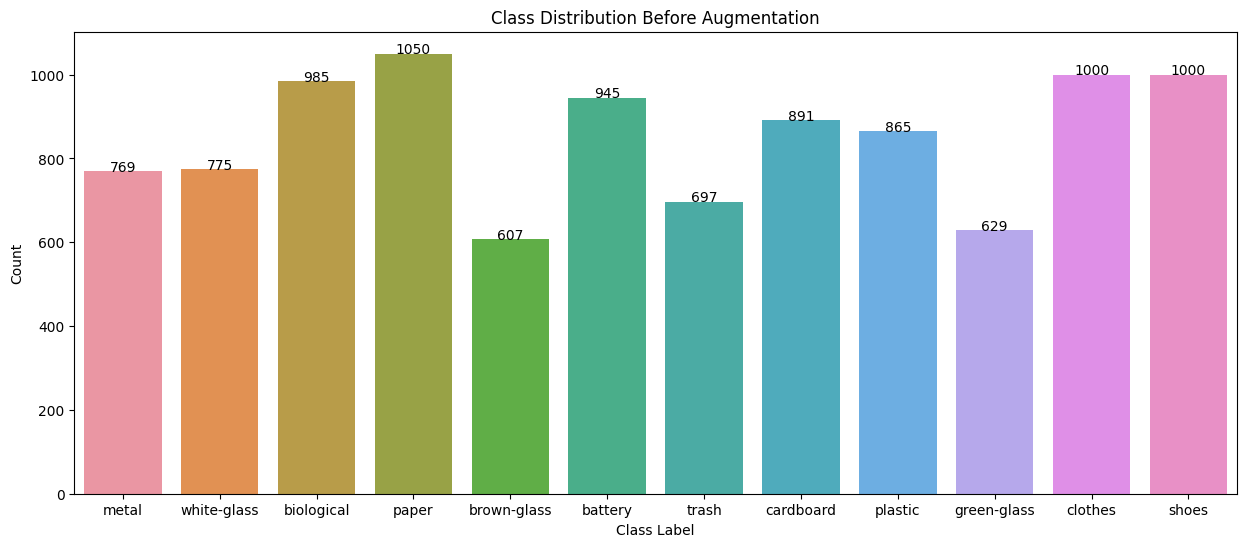

In [8]:
class_distribution = Counter(labels)

# Create a count plot using seaborn
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=labels)
plt.title('Class Distribution Before Augmentation')
plt.xlabel('Class Label')
plt.ylabel('Count')

# Annotate the bars with rounded counts
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 3.3 Inspect the Dataset

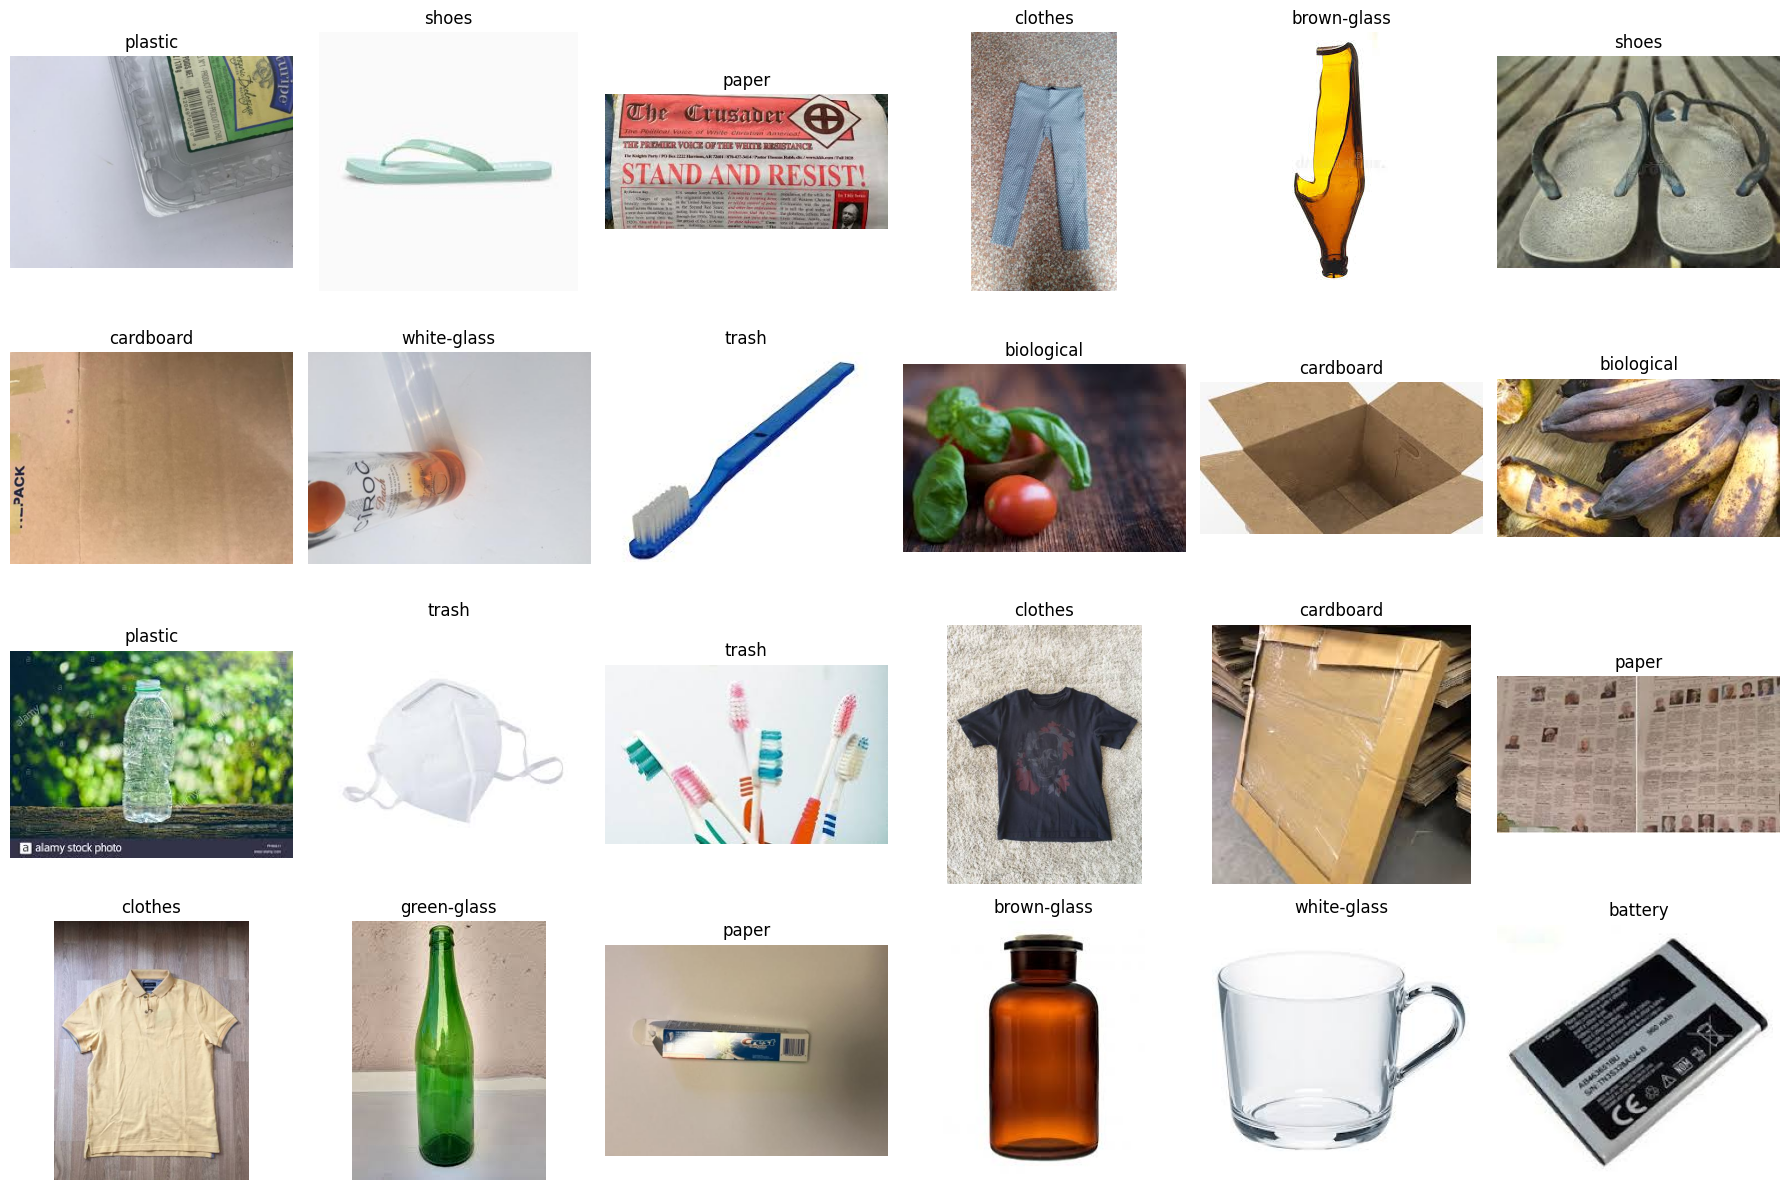

In [9]:
# Set the number of images to display
num_images = 24

# Set up a 4x6 grid for displaying 24 random images
fig, axs = plt.subplots(4, 6, figsize=(18, 12))

# Create a list of random indices for the images
random_indices = random.sample(range(len(images)), min(num_images, len(images)))

# Display the random images
for i, idx in enumerate(random_indices):
    image = images[idx]
    label = labels[idx]
    
    # Display the image on the grid
    axs[i // 6, i % 6].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i // 6, i % 6].set_title(label)
    axs[i // 6, i % 6].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [10]:
# Get unique shapes and their counts
unique_shapes, counts = np.unique([image.shape for image in images], axis=0, return_counts=True)

# Sort by count in descending order
sorted_indices = np.argsort(counts)[::-1]
unique_shapes_sorted = unique_shapes[sorted_indices]
counts_sorted = counts[sorted_indices]

# Display the top 10 unique shapes and their counts
for i in range(min(5, len(unique_shapes_sorted))):
    shape = unique_shapes_sorted[i]
    count = counts_sorted[i]
    print(f"Top {i + 1}: Shape {shape}, Count: {count}")

Top 1: Shape [384 512   3], Count: 2358
Top 2: Shape [225 225   3], Count: 1834
Top 3: Shape [183 275   3], Count: 597
Top 4: Shape [533 400   3], Count: 539
Top 5: Shape [194 259   3], Count: 489


##### Choosing a 128x128 pixel resize size for efficiency, compatibility, memory considerations, and aspect ratio preservation with minimal compression loss.
-   resize_size = (128, 128, 3)



<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> 4- Data Preprocessing

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 4.1 Resizing the images to be all 128*128
   

In [11]:
# Set the target resize size
target_size = (128, 128)

# Resize all images to the target size
images = [cv2.resize(image, target_size) for image in images]


# Print the shape of the first resized image as a check
print("Shape of the first resized image:", images[0].shape)

Shape of the first resized image: (128, 128, 3)


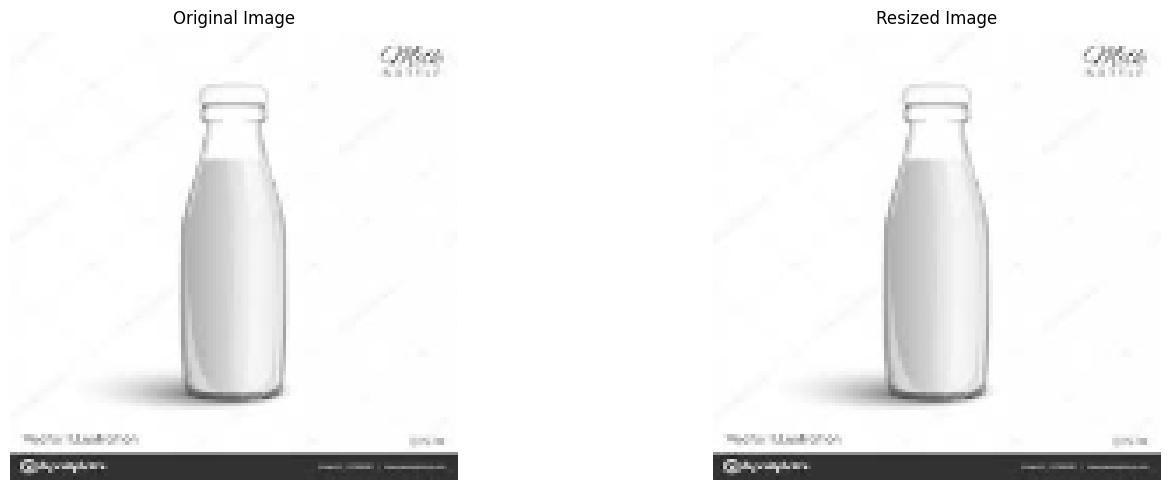

In [12]:
# Select the index of the image to display
sample_index = 1411

# Set up a 1x2 grid for displaying the images
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Original image
original_image = images[sample_index]

# Resized image
resized_image = cv2.resize(original_image, target_size)

# Display the original image
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display the resized image
axs[1].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Resized Image')
axs[1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 4.2 Images Normalization

In [13]:
# Normalize pixel values to the range [0, 1]
normalized_images = (np.array(images)) / 255.0

In [14]:
# Display the shape of the first normalized image as a check
print("Shape of the first normalized image:", normalized_images[0].shape)

Shape of the first normalized image: (128, 128, 3)


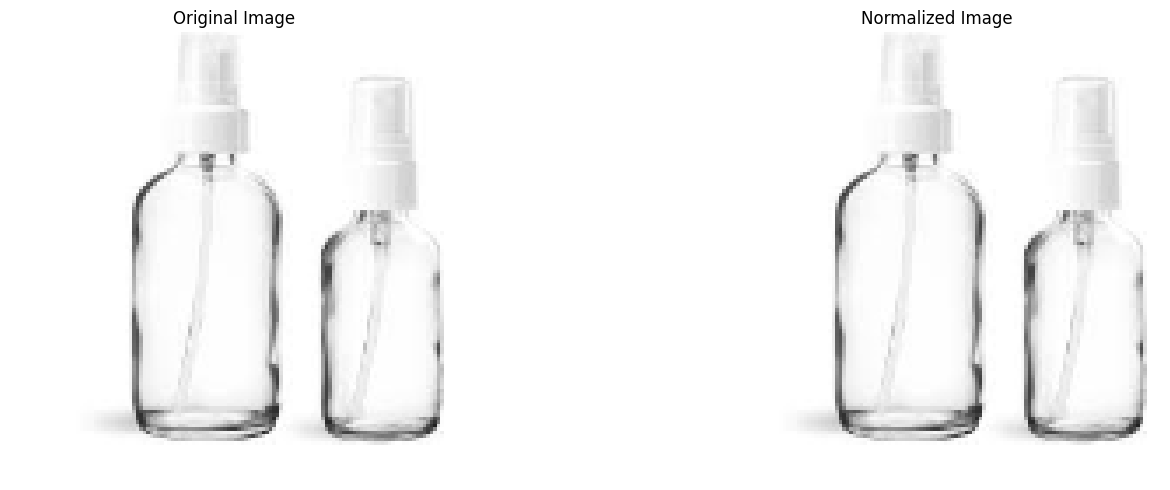

In [15]:
# Select a sample image index to display
sample_image_index = 999

# Set up a 1x2 grid for displaying the images
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Display the original image
axs[0].imshow(cv2.cvtColor(images[sample_image_index], cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display the normalized image
axs[1].imshow(normalized_images[sample_image_index])
axs[1].set_title('Normalized Image')
axs[1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 4.3 Data Encoding 

In [16]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit on the labels
labels = label_encoder.fit_transform(labels)

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 4.2 Data Augmentation 

- I need to exclude Class: clothes, Label: 4 and Class: shoes, Label: 9 from augmentation that both have half the sample data 

In [17]:
# # Specify the classes to exclude from augmentation
# exclude_classes = [4, 9]

# # Create a mask to filter out images from the excluded classes
# exclude_classes_mask = np.isin(labels, exclude_classes)


# # Filter images and labels
# augmentation_images  = np.array(normalized_images)[~exclude_classes_mask]
# augmentation_labels  = labels[~exclude_classes_mask]


# # Filter images and labels for unaugmented data
# non_augmented_images = np.array(normalized_images)[exclude_classes_mask]
# non_augmented_labels = labels[exclude_classes_mask]


# del normalized_images,labels
# gc.collect()

# # Create an ImageDataGenerator instance with desired augmentation settings
# datagen = ImageDataGenerator(
#     rotation_range=360,      # Random rotation in the range [0, 360] degrees
#     width_shift_range=0.2,   # Random horizontal shift
#     height_shift_range=0.2,  # Random vertical shift
#     zoom_range=0.2,          # Random zoom in the range [0.8, 1.2]
#     horizontal_flip=True,    # Random horizontal flip
#     fill_mode='nearest'      # Fill mode for new pixels after transformations
# )


# # List to store augmented images and labels
# augmented_data = []

# # Apply augmentation to each class except classes 4 and 9
# for i, (image, label) in enumerate(zip(augmentation_images, augmentation_labels)):
#     # Reshape the image for augmentation (add an extra dimension)
#     augmentation_image = image[np.newaxis, ...]

#     # Generate 2 augmented versions of the image
#     augmented_images = [datagen.flow(augmentation_image).next()[0] for _ in range(2)]

#     # Append the original and augmented versions to the list
#     augmented_data.extend([(i, 'Original', image, label)] +
#                           [(i, f'Augmented {j+1}', augmented_images[j], label) for j in range(2)])
    
    
# del augmentation_images,augmentation_labels
# gc.collect()

# # Separate augmented data into lists of images and labels
# augmented_images = [item[2] for item in augmented_data]
# augmented_labels = [item[3] for item in augmented_data]

# del augmented_data
# gc.collect()

# len(augmented_images)

# # Extend the list of augmented images and labels with unaugmented data
# augmented_images.extend(non_augmented_images)
# augmented_labels.extend(non_augmented_labels)

# # free some space
# del non_augmented_labels,non_augmented_images
# gc.collect()

# # Print the size of the entire dataset (original images and augmented versions)
# print(f"Size of the entire dataset: {len(augmented_images)}")

# # Convert to NumPy arrays
# augmented_images = np.array(augmented_images)
# augmented_labels = np.array(augmented_labels)

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 4.4 Spliting the Data 80%,10%,10%

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(normalized_images, labels, test_size=0.3,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,shuffle=True)

# Print the sizes of the sets
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 7149
Validation set size: 1532
Test set size: 1532


<p style="color:white;font-size:60px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> 5- Modeling Part

<p style="color:#000C3C;font-size:35px;padding:5px;border-radius:15px;text-align:left;font-weight:bolder"> 5.1 Model 1

In [19]:
from tensorflow.keras import layers, models

# Load a pre-trained model (e.g., MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
#     layers.Dropout(0.3),
    layers.Dense(12, activation='softmax')  # Adjust the number of classes
])

# Compile the model
model.compile(keras.optimizers.Adam(learning_rate=0.0002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 2423500 (9.24 MB)
Trainable params: 165516 (646.55 KB)
Non-trainable params: 2257984 (8.61 MB)
________________

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # or 'val_accuracy'
                               patience=3,          # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)

# Assuming you have already defined train_data_generator and val_data
history = model.fit(X_train, y_train, epochs=25,
                                  validation_data=(X_val, y_val),
                                  use_multiprocessing=True,
                                  shuffle=True,
                                  batch_size=256,
                                  callbacks=[early_stopping])

Epoch 1/25
28/28 [==============================] - 15s 202ms/step - loss: 1.9265 - accuracy: 0.4091 - val_loss: 1.2884 - val_accuracy: 0.6384
Epoch 2/25
28/28 [==============================] - 3s 98ms/step - loss: 1.0011 - accuracy: 0.7075 - val_loss: 0.8361 - val_accuracy: 0.7376
Epoch 3/25
28/28 [==============================] - 3s 97ms/step - loss: 0.6987 - accuracy: 0.7854 - val_loss: 0.6626 - val_accuracy: 0.7905
Epoch 4/25
28/28 [==============================] - 3s 99ms/step - loss: 0.5557 - accuracy: 0.8319 - val_loss: 0.5720 - val_accuracy: 0.8198
Epoch 5/25
28/28 [==============================] - 3s 98ms/step - loss: 0.4694 - accuracy: 0.8555 - val_loss: 0.5164 - val_accuracy: 0.8362
Epoch 6/25
28/28 [==============================] - 3s 97ms/step - loss: 0.4083 - accuracy: 0.8803 - val_loss: 0.4843 - val_accuracy: 0.8499
Epoch 7/25
28/28 [==============================] - 3s 97ms/step - loss: 0.3622 - accuracy: 0.8943 - val_loss: 0.4531 - val_accuracy: 0.8577
Epoch 8/25


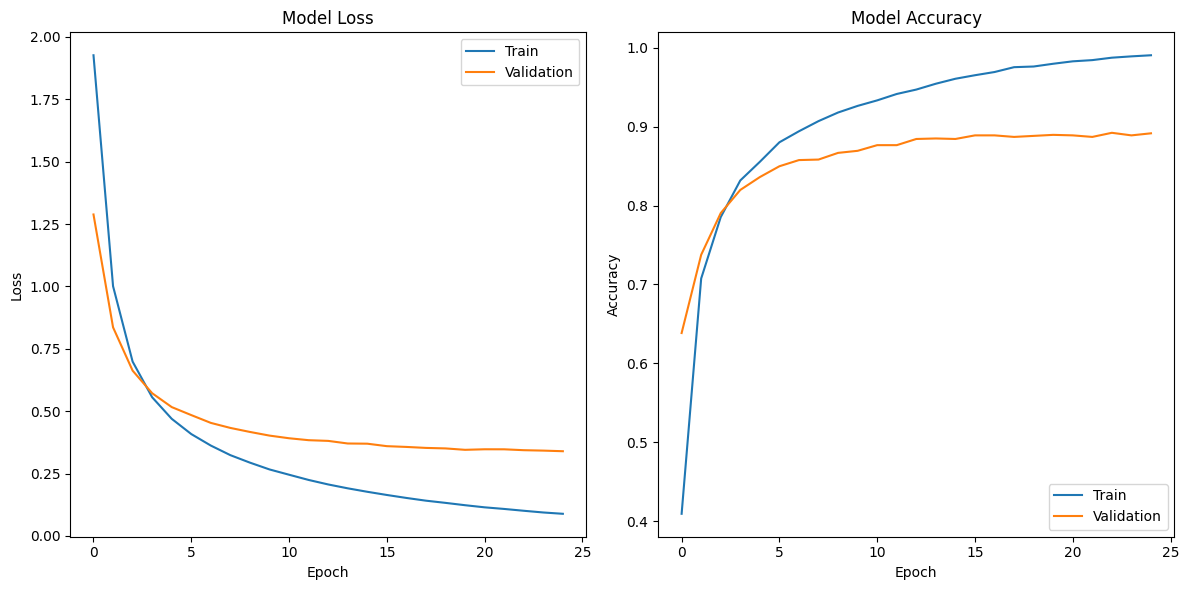

In [21]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

48/48 [==============================] - 1s 20ms/step - loss: 0.4199 - accuracy: 0.8649
Test Accuracy: 86.49%


<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> 6- section

In [23]:
# del model
# del history
# gc.collect()

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center;font-weight:bolder"> 7- section